In [1]:
# install CoMut and packages - DO NOT CHANGE THIS CELL
# some errors will appear if running in Colab - they can be ignored
!pip -q install comut
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import matplotlib.pyplot as plt

# if running in Colab, import tutorial data
import sys
if 'google.colab' in sys.modules:
  !apt-get install subversion -q > /dev/null
  !svn export -q https://github.com/vanallenlab/comut/trunk/examples/tutorial_data

# Quickstart

This notebook contains easily editable code to generate basic comutation plots with CoMut.

# Specify MAF file and generate comut

To make a basic comut of just mutation data, simply change the path below to your MAF file. You can then specify optional parameters to change the comut's appearance (see below). Then click `Run -> Run All`, and the comut will be saved as `mutation_comut` with your file extension. 

__Google Colab__: For users viewing this notebook in Google Colab, you need to upload your MAF file to this notebook. To do so, click the folder icon to the left to open the files menu. Drag and drop your MAF file from your computer into this area - it should upload to google drive. You can then specify the path to your MAF as normal. When the notebook is run, you can download your comut by right clicking in the files menu.

In [2]:
maf_path = 'tutorial_data/melanoma_example/melanoma.maf' # change this to the path of your MAF
genes = ['CDKN2A', 'TP53', 'NF1', 'NRAS', 'BRAF']

# Optional parameters

These parameters change the appearance of the comut. Change nothing to use the defaults. For more information on these parameters, visit the [documentation](https://github.com/vanallenlab/comut/blob/package/examples/documentation.ipynb) of CoMut.

In [3]:
figsize = (10,3) # the size of the figure - changes the shape of the squares in the comut
dpi = 300 # change the output resolution
extension = '.svg' # extension for saving - can otherwise be .pdf or .png

# You can provide a list of samples to order your comut (from left to right). If none is provided, it will be calculated from your MAF.
samples = None

x_padding = 0.04 # the x distance between patches in comut
y_padding = 0.04 # the y distance between patches in comut
tri_padding = 0.03 # the distance between triangles in comut

# define the mapping of mutation type to color. Only these mutation types are shown
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
mut_mapping = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift indel': vivid_10[4], 'Splice site': vivid_10[9]}

# Creating the basic comut

First we create the CoMut object and define the samples (if samples weren't defined, it will take them from the MAF).

In [4]:
example_comut = comut.CoMut()
example_comut.samples = samples

Then we read in the MAF and subset it to nonsilent mutations

In [5]:
# read in the maf
mutation_data = pd.read_csv(maf_path, sep = '\t')

# parse the maf. This will subset to nonsilent mutations and rename columns to what CoMut expects
mutation_df = fileparsers.parse_maf(mutation_data)
mutation_df.head(2)

,sample,category,value
1,Patient10,RFX6,Missense
2,Patient10,PTPRQ,Missense


Then we add the mutation data to the CoMut object and plot it, saving the figure

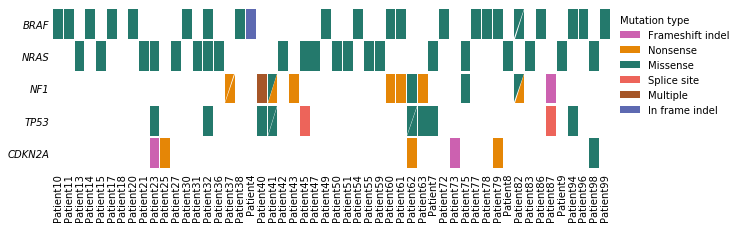

In [6]:
# add data to the CoMut object
example_comut.add_categorical_data(mutation_df, name = 'Mutation type', category_order = genes, mapping = mut_mapping, tick_style = 'italic')

# plot comut and add unified legend
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()

Then the comut can be saved. An svg is often desirable because it is infinitely scaleable (as you zoom in, resolution does not decrease).

In [7]:
example_comut.figure.savefig('mutation_comut' + extension, dpi = dpi, bbox_inches = 'tight')

# Adding clinical data

The example below adds two rows of clinical data to the comut - purity (a continuous variable) and primary type (a categorical variable). Should you wish to add more clinical data, simply mirror the current code and add more data with `comut.add_continuous_data` or `comut.add_categorical_data`

First we read in the data as dataframes:

In [8]:
purity_data = pd.read_csv('tutorial_data/melanoma_example/purity.tsv', sep = '\t') # the path to the purity data
purity_data.head(2)

,sample,category,value
0,Patient41,Purity,0.7
1,Patient62,Purity,0.5


In [9]:
primary_type_data = pd.read_csv('tutorial_data/melanoma_example/primary_type.tsv', sep = '\t') # path to primary type data
primary_type_data.head(2)

,sample,category,value
0,Patient41,Primary type,Skin
1,Patient62,Primary type,Skin


Then we define color mappings for purity and primary type that define how they appear in the comut:

In [10]:
# a color map is required for continuous values
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
primary_type_mapping = {'Skin':vivid_10[6], 'Acral': vivid_10[2], 'Occult': vivid_10[-1], 'Mucosal': vivid_10[4]}

Then we add the clinical data to the CoMut object and plot it

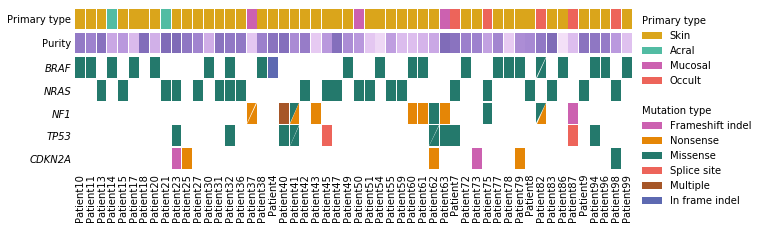

In [11]:
example_comut.add_continuous_data(purity_data, name = 'Purity',  mapping = purp_7)
example_comut.add_categorical_data(primary_type_data, name='Primary type', mapping = primary_type_mapping)

# plot CoMut and save
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, figsize = figsize)
example_comut.add_unified_legend()
example_comut.figure.savefig('mutation_comut_clinical' + extension, bbox_inches = 'tight', dpi = dpi)

# Adding a Bar Graph

The example below continues and adds a bar graph on top of the comut

First we read in the data as a dataframe:

In [12]:
mut_burden_data = pd.read_csv('tutorial_data/melanoma_example/mutational_burden.tsv', sep = '\t')
mut_burden_data.head(2)

,sample,Clonal,Subclonal
0,Patient41,8924,662
1,Patient62,5401,203


Then we define a mapping for how the categories should appear in the comut:

In [13]:
burden_mapping = {'Clonal':vivid_10[8], 'Subclonal':purp_7(0.5)}

Then we add the data to the CoMut object and plot it:

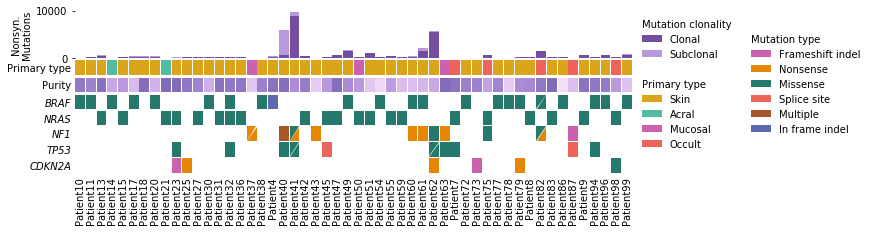

In [14]:
example_comut.add_bar_data(mut_burden_data, name = 'Mutation clonality', mapping = burden_mapping, stacked = True, 
                            ylabel = 'Nonsyn.\nMutations')

# plot CoMut
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, figsize = figsize)
example_comut.add_unified_legend(axis_name = 'Mutation clonality', ncol = 2)
example_comut.figure.savefig('mutation_comut_clinical_bar' + extension, bbox_inches = 'tight', dpi = dpi)

# Adding a Side Bar Graph

We continue the example by adding a side bar indicating the number of samples mutated in a gene. First we read in the data:

In [15]:
mut_freq = pd.read_csv('tutorial_data/melanoma_example/mutation_frequency.tsv', sep = '\t')
mut_freq.head(2)

,category,Mutated samples
0,BRAF,22
1,NRAS,21


Then we define a mapping for how the side bar graph should appear in the comut:

In [16]:
side_mapping = {'Mutated samples': 'darkgrey'}

Then we add the data to the comut and plot it:

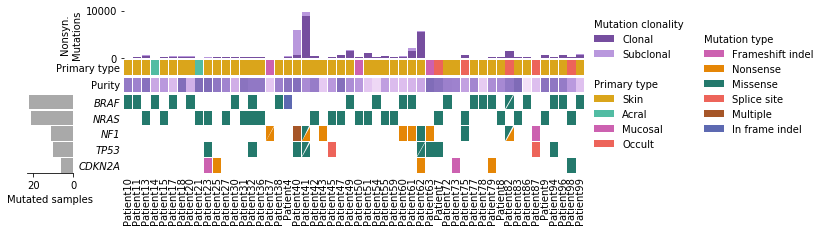

In [17]:
example_comut.add_side_bar_data(mut_freq, paired_name = 'Mutation type', name = 'Mutated samples', position = 'left', 
                                mapping = side_mapping, xlabel = 'Mutated samples')

# plot comut and save
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, figsize = figsize, widths = [0.5, 5])
example_comut.add_unified_legend(axis_name = 'Mutation clonality', ncol = 2)
example_comut.figure.savefig('mutation_comut_clinical_bar_side' + extension, bbox_inches = 'tight', dpi = dpi)